In [1]:
%load_ext autoreload
%autoreload 2

# add root folder to path
import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../plotting/style_sheet.mplstyle')
from synthetic_data.dataset import Dataset
from plotting import plotting_utils
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
dataset = Dataset(
    num_sets=2,
    num_neurons=50,
    latent_dim=5,
    latent_timescale=0.1,
    dt=0.01,
    max_firing_rate=100.0,
    trial_duration=2.0,
)

In [3]:
# Get a batch of data 
data_iter = iter(dataset)
batch = next(data_iter)
time, latents, spike_counts = batch['time'], batch['latents'], batch['spike_counts']

In [4]:
# Calcualte PCs of spike counts
N_PCS = 50
pca = PCA(n_components=N_PCS)
spike_counts_centered = spike_counts - spike_counts.mean(dim=0, keepdim=True)
pcs = pca.fit_transform(spike_counts_centered.numpy())
reg = LinearRegression().fit(pcs, latents.numpy()[:, :N_PCS])
pcs_aligned = reg.predict(pcs)
pcs = pcs_aligned

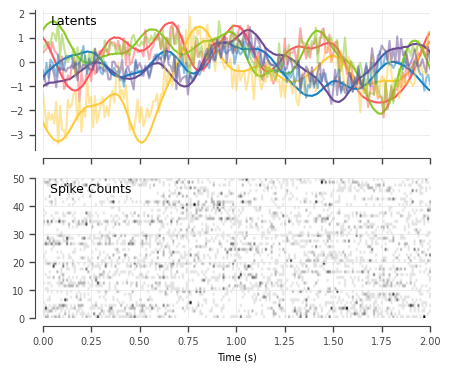

In [5]:
# Plot latents and alinged-spike-count PCs
fig, ax = plt.subplots(2,1, figsize=(5,4), sharex=True)
ax[0].plot(time, latents)
ax[0].text(0.02, 0.9, "Latents", transform=ax[0].transAxes)
ax[0].set_prop_cycle(None)  # reset color cycle
ax[0].plot(time, pcs, alpha=0.5)

# Plot spike counts
ax[1].imshow(spike_counts.T, aspect='auto', cmap='Greys', origin='lower', extent=[time[0], time[-1], 0, spike_counts.shape[1]])
ax[1].text(0.02, 0.9, "Spike Counts", transform=ax[1].transAxes)
ax[1].set_xlabel("Time (s)")

plotting_utils.outset_axes(ax[0])
plotting_utils.outset_axes(ax[1])
